In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy
from scipy.stats import chi2_contingency
from scipy.stats import shapiro, normaltest
from scipy.stats import spearmanr, pearsonr

In [2]:
df = pd.read_csv("C://Users/naikp/Downloads/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


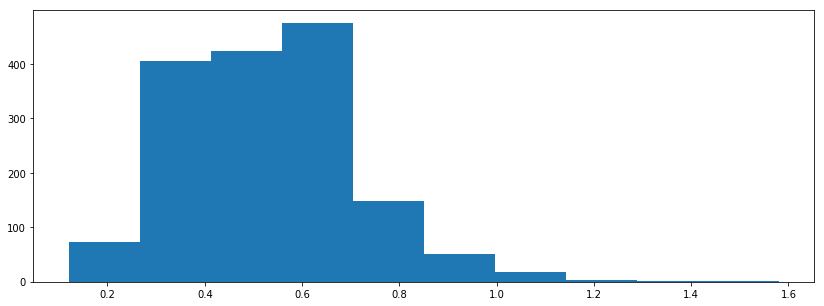

In [7]:
plt.figure(figsize=(14,5))
plt.hist(df['volatile acidity'])
plt.show()

Text(0.5, 0, 'alcohol level')

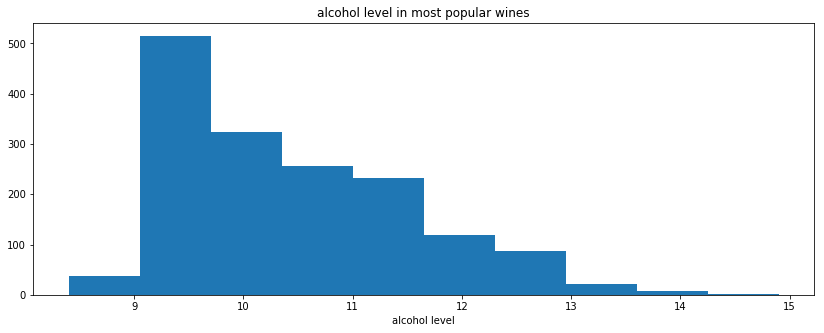

In [12]:
plt.figure(figsize=(14,5))
plt.hist(df['alcohol'])
plt.title('alcohol level in most popular wines')
plt.xlabel("alcohol level")

# Shapiro Test

In [16]:
# Statistically proving the above data is not normlly distributed
from scipy.stats import shapiro

data_to_test = df['alcohol']

stat, p = shapiro(data_to_test)

print('stat = %.2f, p=%.3f' %(stat, p))

if p > 0.05:print('Normal Distribution')
    
else:print("Not a Normal Distribution")

stat = 0.93, p=0.000
Not a Normal Distribution


In [14]:
# Lets generate normally distributed data
from numpy.random import randn
data_to_test = randn(10)
data_to_test

array([ 0.51066622,  0.50822504, -1.10638603,  0.04821855, -0.25064158,
       -0.1982061 ,  0.98322029, -1.59469924, -1.25105296, -0.67230933])

In [15]:
stat, p = shapiro(data_to_test)

print('stat = %.2f, p=%.3f' %(stat, p))

if p > 0.05:print('Normal Distribution')
    
else:print("Not a Normal Distribution")

stat = 0.96, p=0.827
Normal Distribution


# K^2 normality test

In [18]:
data_to_test = df['alcohol']

stat, p = normaltest(data_to_test)

print('stat = %.2f, p=%.3f' %(stat, p))

if p > 0.05:print('Normal Distribution')
    
else:print("Not a Normal Distribution")

stat = 154.18, p=0.000
Not a Normal Distribution


# Correlation Test - 

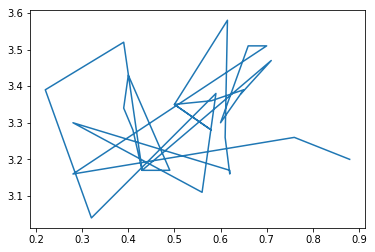

In [19]:
first_sample = df[1:30]['volatile acidity']
second_sample = df[1:30]['pH']

plt.plot(first_sample, second_sample)
plt.show()

# Spearman's Rank Correlation test

In [26]:
stat, p = spearmanr(first_sample, second_sample)

print('stat = %.3f, p=%.5f' %(stat, p))

if p > 0.05:print('independent samples')
    
else:print("dependent samples")

stat = 0.199, p=0.30136
independent samples


# Pearson Correlation test

In [25]:
stat, p = pearsonr(first_sample, second_sample)

print('stat = %.3f, p=%.5f' %(stat, p))

if p > 0.05:print('independent samples')
    
else:print("dependent samples")

stat = 0.176, p=0.36047
independent samples


In [30]:
cor = df.corr(method='pearson')

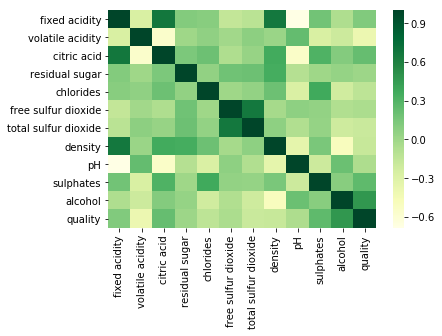

In [39]:
sns.heatmap(cor, cmap='YlGn')

# Correlation between Categorical variables

# Chi Square Test

test whether 2 cat vars are related or independent
Assumption - independent vars, size in each box of contigency table > 25

In [41]:
data = pd.read_csv('E://DS,ML/Databases/titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
contigency_data = pd.crosstab(data['Survived'], data['Sex'], margins=False)
contigency_data

Sex,female,male
Survived,,
0,81,468
1,233,109


In [59]:
import scipy
from scipy.stats import chi2_contingency

In [44]:
stat, p, dof, expected = chi2_contingency(contigency_data)
print('stat=%.3f, p=%.5f'%(stat,p))

if p > 0.05:print('independent samples')
    
else:print("dependent samples")

stat=260.717, p=0.00000
dependent samples


# Parametric Tests

# here main assumption is--> Data is normally distributed

In [54]:
# acidity level
df[['free sulfur dioxide','total sulfur dioxide']].head()

,free sulfur dioxide,total sulfur dioxide
0,11.0,34.0
1,25.0,67.0
2,15.0,54.0
3,17.0,60.0
4,11.0,34.0


In [57]:
print('mean of free sulfur dioxide',np.mean(df['free sulfur dioxide']))
print('mean of total sulfur dioxide',np.mean(df['total sulfur dioxide']))

mean of free sulfur dioxide 15.874921826141339
mean of total sulfur dioxide 46.46779237023139


# T - test

In [76]:
# 1 sample t-test
scipy.stats.ttest_1samp(df['free sulfur dioxide'],16)

Ttest_1sampResult(statistic=-0.47815374542075434, pvalue=0.6326061853081255)

In [73]:
scipy.stats.ttest_1samp(df['free sulfur dioxide'],10)

Ttest_1sampResult(statistic=22.458881422412947, pvalue=2.6136916416981904e-97)

In [75]:
scipy.stats.ttest_1sampamp(df['total sulfur dioxide'],60)

Ttest_1sampResult(statistic=-16.44972757493214, pvalue=2.726327747624821e-56)

In [72]:
scipy.stats.ttest_1samp(df['total sulfur dioxide'],46)

Ttest_1sampResult(statistic=0.5686475749167762, pvalue=0.5696752348716216)

In [77]:
# independent sample t-test
scipy.stats.ttest_ind(df['free sulfur dioxide'],df['total sulfur dioxide'])

Ttest_indResult(statistic=-35.44004727962197, pvalue=2.48311577263352e-232)

In [80]:
# paired sample t-test
# at different time intervals, from same source data is captured
scipy.stats.ttest_rel(df['free sulfur dioxide'],df['total sulfur dioxide'])

Ttest_relResult(statistic=-45.21436103116898, pvalue=3.469532356139319e-288)

In [81]:
# paired sample t-test
# at different time intervals, from same source data is captured
scipy.stats.ttest_rel(df['free sulfur dioxide'][0:10],df['free sulfur dioxide'][11:21])

Ttest_relResult(statistic=-1.8084105831390456, pvalue=0.10399639997755163)

In [ ]:
# both means are not same, hence p is small
# both are not related, hence p is small
# means are not closer, hece p value is small

# Anova Test

test whether the means of 2 or more independent samples are different

Assumption - normal distribution, same variance, identical distribution

In [4]:
source_A = [23, 21, 31, 20, 19, 35, 26, 22, 21, 19]
source_B = [40, 44, 60, 50, 48, 68, 55, 46, 44, 54]
source_C = [46, 42, 62, 40, 38, 70, 52, 44, 42, 38]

In [7]:
stat, p = scipy.stats.f_oneway(source_A, source_B, source_C)
print('stat=%.3f, p=%.5f'%(stat,p))

if p > 0.05:print('same distribution of sources')
    
else:print("different distribution of sources")

stat=30.173, p=0.00000
different distribution of sources


# Non Parametric Tests

Assumptions - Identical distribution, observations can be ranked

In [8]:
score1 = [92,90,85,80,76]
score2 = [88,86,85,84,83]

# Mann-Whitney test

tests whether  the distribution of 2 or more independent samples are equal or not

In [10]:
stat, p = scipy.stats.mannwhitneyu(score1,score2)
print('stat=%.3f, p=%.5f'%(stat,p))

if p > 0.05:print('same distribution of sources')
    
else:print("different distribution of sources")

stat=12.500, p=0.45828
same distribution of sources


# Wilcoxon Signed Rank

In [11]:
stat, p = scipy.stats.wilcoxon(score1,score2)
print('stat=%.3f, p=%.5f'%(stat,p))

if p > 0.05:print('same distribution of sources')
    
else:print("different distribution of sources")

stat=4.000, p=0.70546
same distribution of sources


C:\Users\naikp\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


# Kruskal-Wallis H test

In [12]:
stat, p = scipy.stats.kruskal(score1,score2)
print('stat=%.3f, p=%.5f'%(stat,p))

if p > 0.05:print('same distribution of sources')
    
else:print("different distribution of sources")

stat=0.000, p=1.00000
same distribution of sources


# Test of Stationarity

## Very imp test for time series analysis

# (ADF) Augmented Dicky-Fuller Test 

null hypothesis - Series is non stationary

Definition of stationary time-series  - constant mean and variance

In [13]:
from statsmodels.tsa.stattools import adfuller
stock_price_data = [121,131,142,138,139,142,156,168,165]

In [14]:
stat, p, lags, obs, crit, t = adfuller(stock_price_data)

C:\Users\naikp\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:846: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


In [15]:
print('stat=%.3f, p=%.3f'%(stat,p))

if p > 0.05:print('series is not stationary')
    
else:print("series is stationary")

stat=-0.949, p=0.772
series is not stationary


# (KPSS) Kwiatkowski-Phillips-Schmidt-Shin

A key difference from ADF test is the null hypothesis of the KPSS test is that the series is stationary.

In [16]:
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(stock_price_data)

KPSS Statistic: 0.4444444444444436
p-value: 0.05799808429118812
num lags: 7
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary
